### Aman Pandey
## Domain : Data Science
## Task1- to build a model that predicts whether a passenger on the Titanic survived or not.

In [10]:
## importing necessary library

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [69]:
## Loading the data 

In [70]:
df=pd.read_csv(r"C:\Users\AMAN\Downloads\Titanic-Dataset.csv")

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
## number of rows and columns

In [73]:
df.shape

(891, 12)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
## Dropping the cabin column from the datatset

In [78]:
df.drop(columns='Cabin',inplace=True)

In [79]:
df.shape

(891, 11)

In [80]:
df.drop(columns='Age',inplace=True)

In [81]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [82]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [83]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [87]:
df['Survived'].value_counts()
#we can coclude that out of 891 passengers only 342 survived 

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

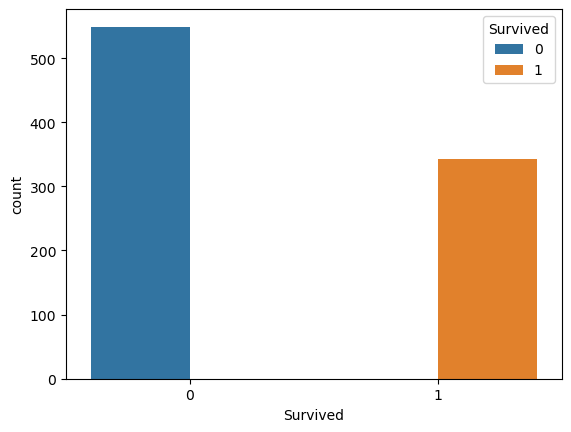

In [92]:
#we can understand it better by visualization
sns.countplot('Survived',data=df,hue='Survived')

In [93]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

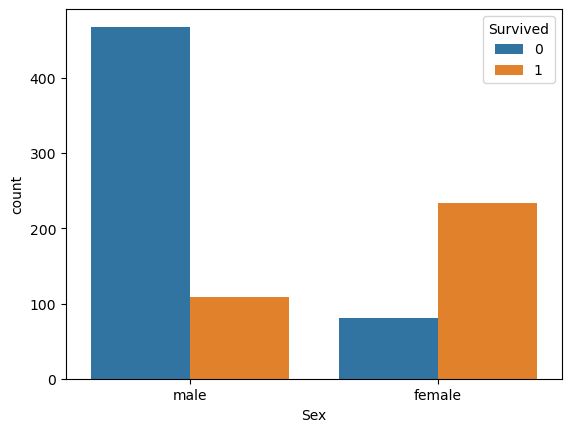

In [96]:
sns.countplot('Sex',hue='Survived',data=df)
## we can conclude from the visualization that even though we have more number of males passengers in dataset the female passenger survived more

In [103]:
#Converting categorical columns into numerical
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [104]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,0


In [106]:
## Seperating Dependent and Independent columns
X=df.drop(columns=['Name','PassengerId','Ticket','Survived'],axis=1)
y=df['Survived']

In [107]:
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,7.2500,0
1,1,1,1,0,71.2833,1
2,3,1,0,0,7.9250,0
3,1,1,1,0,53.1000,0
4,3,0,0,0,8.0500,0


In [108]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [109]:
## splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)

In [111]:
regressor=LogisticRegression()

In [112]:
regressor.fit(X_train,y_train)

LogisticRegression()

In [114]:
y_pred=regressor.predict(X_test)

In [115]:
## Evaluating the Model

In [129]:
print('accuracy of Model:',accuracy_score(y_pred,y_test))

accuracy of Model: 0.8
